In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("Datasets/IMDb Movies India.csv", encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [50]:
df.shape

(15509, 10)

In [51]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [52]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

EDA and Data Preprocessing

In [53]:
movies_df = df.dropna(subset=['Rating'])
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [54]:
movies_df = movies_df.dropna()
movies_df.shape

(5659, 10)

In [55]:
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [56]:
# Extract numeric part of the Year column and convert to integer
movies_df['Year'] = movies_df['Year'].str.extract('(\d{4})').astype(int)

# Extract numeric part of the Duration column and convert to integer
movies_df['Duration'] = movies_df['Duration'].str.extract('(\d+)').astype(int)

# Convert Votes column to integer (if not done already)
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').astype(int)

# Display the first few rows to verify the transformations
movies_df[['Year', 'Duration', 'Votes']].head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pranav\AppData\Local\Temp\ipykernel_18556\3028479871.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies_df['Year'] = movies_df['Year'].str.extract('(\d{4})').astype(int)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_18556\3028479871.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies_df['Duration'] = movies_df['Duration'].str.extract('(\d+)').astype(int)


,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326


In [57]:
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [58]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

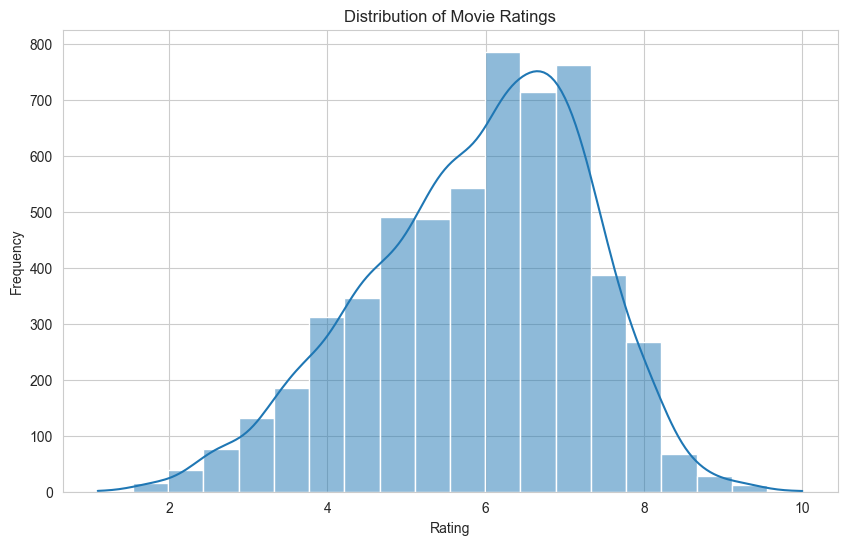

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

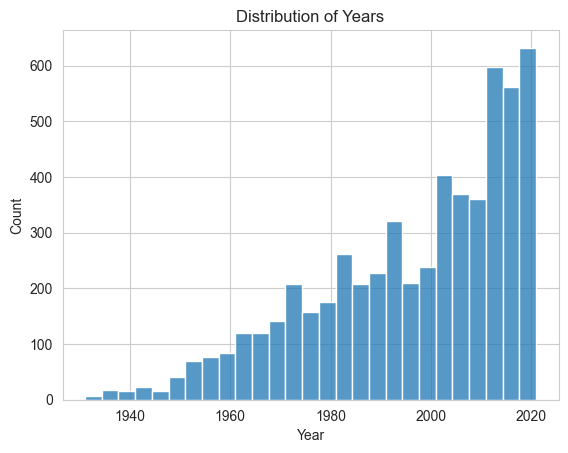

In [61]:
sns.histplot(x=movies_df["Year"])
plt.title("Distribution of Years")
plt.show()

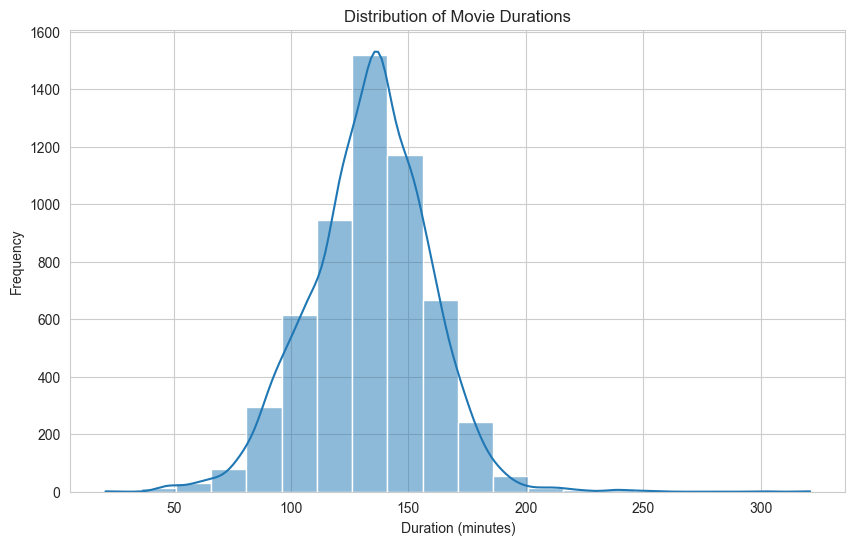

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

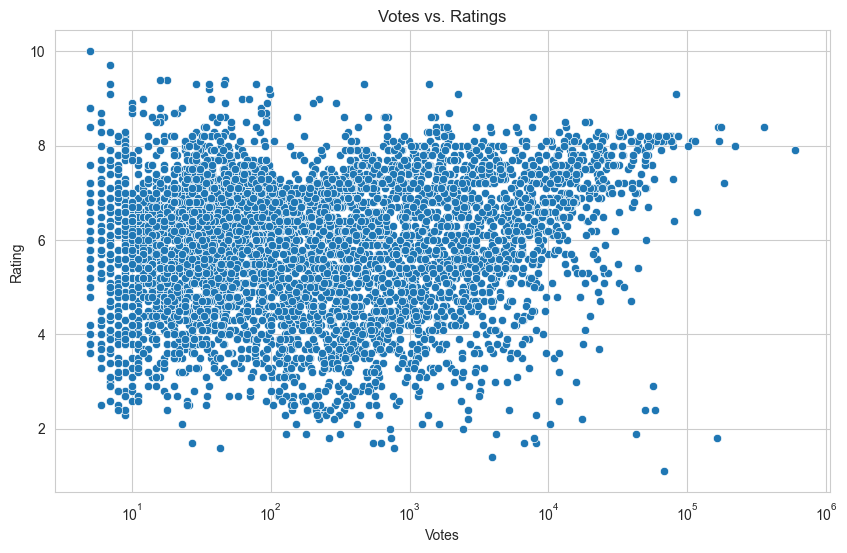

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='Votes', y='Rating')
plt.title('Votes vs. Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.show()

In [64]:
movies_df["Genre"]=movies_df.groupby("Genre")["Rating"].transform("mean")
movies_df["Director"]=movies_df.groupby("Director")["Rating"].transform("mean")
movies_df["Actor 1"]=movies_df.groupby("Actor 1")["Rating"].transform("mean")
movies_df["Actor 2"]=movies_df.groupby("Actor 2")["Rating"].transform("mean")
movies_df["Actor 3"]=movies_df.groupby("Actor 3")["Rating"].transform("mean")
movies_df["Name"]=movies_df.groupby("Name")["Rating"].transform("mean")

Model Training

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

In [66]:
X = movies_df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = movies_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [68]:
import numpy as np
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.6533798161339572


In [69]:
import joblib

# Save the model
joblib.dump(model, 'movie_rating_lr_model.pkl')

# Load the model
loaded_model = joblib.load('movie_rating_lr_model.pkl')